As part of Quantium’s retail analytics team; your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

In [134]:
# Importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [135]:
#Loading the datasets
transaction =  pd.read_excel(r"C:\Users\akars\Downloads\QVI_transaction_data.xlsx")
behaviour=pd.read_csv(r"C:\Users\akars\Downloads\QVI_purchase_behaviour.csv")

In [136]:
# Viewing the transaction data
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [137]:
# Viewing the behaviour data
behaviour.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


### Initial Tasks for Data Cleaning

#### Transaction Table

1) Conversion to date format for transaction table

2) Checking if Store Numbers, Product numbers and Loyalty Card Numbers are labels since they identify the unique customers, products and stores.

3) Creating columns for transaction table based on product name, such as Brand name, pkg weight, and product description.

4) Checking product description to identify chips from other products if any, product description frequency of words. Selecting only chips product

5) Checking the summary of data. Identify and remove outliers if any. Check for null values, data types etc. 

6) Left join the transaction table with behaviour table to add life stage anad premium details.






In [138]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [139]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'],errors='coerce',unit='d',origin='1900-01-01')

In [140]:
# Checking for the time periods covered by the transactions and how it is distributed over the years.
pd.DatetimeIndex(transaction.DATE).year.value_counts()

2019    132600
2018    132236
Name: DATE, dtype: int64

In [141]:
transaction['STORE_NBR'] = transaction['STORE_NBR'].astype('object')
transaction['LYLTY_CARD_NBR'] = transaction['LYLTY_CARD_NBR'].astype('object')
transaction['PROD_NBR'] = transaction['PROD_NBR'].astype('object')
transaction['TXN_ID'] = transaction['TXN_ID'].astype('object')

In [142]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null object
LYLTY_CARD_NBR    264836 non-null object
TXN_ID            264836 non-null object
PROD_NBR          264836 non-null object
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 16.2+ MB


In [143]:
transaction.describe()
 

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


Looks like there are no missing values in the data so far and from the min/max range it looks like we have outliers. Lets first 
analyze the data based on product name and see if it still exists.

Product name can be seperated into brand name, product packing dimensions and descrpiton of the product

In [144]:
# Extracting first name from product name which is the brand name
transaction['BRAND_NAME']=transaction['PROD_NAME'].apply(lambda x: x.split(" ")[0])
    

In [145]:
# extracting the last word from product namewhich is the pkg details
transaction['PROD_PKG']=transaction['PROD_NAME'].apply(lambda x: x.split(" ")[-1])

In [146]:
# removing the first word from product name
transaction['PROD_DESC'] = transaction['PROD_NAME'].str.split(n=1).str[1]

In [147]:
# also removing the last word further to get the product description
transaction['PROD_DESC']=transaction['PROD_DESC'].str.rsplit(' ',1).str[0]

In [148]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,SeaSalt175g,Chip Compny
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175g,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175g,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170g,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150g,Corn Chip Mexican Jalapeno


In [149]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null object
LYLTY_CARD_NBR    264836 non-null object
TXN_ID            264836 non-null object
PROD_NBR          264836 non-null object
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
BRAND_NAME        264836 non-null object
PROD_PKG          264836 non-null object
PROD_DESC         264836 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 22.2+ MB


In [150]:
transaction.PROD_PKG.value_counts()

175g                  60561
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6418
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
180g                   1468
SeaSalt175g            1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: PROD_PKG, dtype: int64

You can see that there are multiple data with mix of product description and dimensions. We have to clean the data for it

In [151]:
transaction['PROD_DESC'] = transaction['PROD_DESC']+' '+transaction['PROD_PKG'].str[:-4]

In [152]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,SeaSalt175g,Chip Compny SeaSalt
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175g,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175g,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170g,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150g,Corn Chip Mexican Jalapeno


In [153]:
#extracting only numeric characters
transaction['PROD_PKG']= transaction.PROD_PKG.str.extract('(\d+)')

In [154]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,Chip Compny SeaSalt
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,Corn Chip Mexican Jalapeno


In [155]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null object
LYLTY_CARD_NBR    264836 non-null object
TXN_ID            264836 non-null object
PROD_NBR          264836 non-null object
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
BRAND_NAME        264836 non-null object
PROD_PKG          261579 non-null object
PROD_DESC         264836 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 22.2+ MB


In [156]:
transaction.PROD_PKG.value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PROD_PKG, dtype: int64

You can see that around 3257 observations are missing in product pkg. As observed earlier the product name 

In [157]:
transaction["PROD_PKG"].fillna("No Value", inplace = True) 

In [158]:
transaction.PROD_PKG.value_counts()

175         66390
150         43131
134         25102
110         22387
170         19983
165         15297
300         15166
330         12540
380          6418
270          6285
210          6272
200          4473
No Value     3257
250          3169
90           3008
190          2995
160          2970
220          1564
70           1507
180          1468
125          1454
Name: PROD_PKG, dtype: int64

In [159]:
transaction[transaction['PROD_PKG'] == 'No Value']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
65,2019-05-22,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea
153,2019-05-19,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,No Value,135g Swt Pot Sea
174,2018-08-22,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea
177,2019-05-19,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,No Value,135g Swt Pot Sea
348,2018-10-28,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea
...,...,...,...,...,...,...,...,...,...,...,...
264564,2018-10-10,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea
264574,2019-06-14,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea
264725,2018-07-22,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,No Value,135g Swt Pot Sea
264767,2019-06-10,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,No Value,135g Swt Pot Sea


In [160]:
transaction["PROD_PKG"].replace({"No Value": "135"}, inplace=True)


In [161]:
transaction[transaction['PROD_PKG'] == '135']
# we have replaced the no values with 135 as needed. However PROD_Desc still needs to be edited. Further text ckleaning will be done later.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
65,2019-05-22,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea
153,2019-05-19,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,135g Swt Pot Sea
174,2018-08-22,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea
177,2019-05-19,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,135g Swt Pot Sea
348,2018-10-28,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea
...,...,...,...,...,...,...,...,...,...,...,...
264564,2018-10-10,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea
264574,2019-06-14,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea
264725,2018-07-22,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,135g Swt Pot Sea
264767,2019-06-10,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,135g Swt Pot Sea


In [162]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null object
LYLTY_CARD_NBR    264836 non-null object
TXN_ID            264836 non-null object
PROD_NBR          264836 non-null object
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
BRAND_NAME        264836 non-null object
PROD_PKG          264836 non-null object
PROD_DESC         264836 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 22.2+ MB


#### Now we have zero null values and all products are accounted for.

In [163]:
transaction.PROD_DESC.value_counts()

Original                           4673
Mozzarella   Basil & Pesto         3304
Tortilla ChpsHny&Jlpno Chili       3296
Popd Swt/Chlli &Sr/Cream Chips     3269
Crisps     Ched & Chives           3268
                                   ... 
Pc Sea Salt                        1431
Medium   Salsa                     1430
Sour Cream &    Garden Chives      1419
Fries Potato Chips                 1418
Crinkle Cut      Original          1410
Name: PROD_DESC, Length: 113, dtype: int64

#### There is Salsa products mixed with our chips data set. Hence we have to remove them while considering our data. Also we can remove the punctuations and extra spaces in the product desscription

In [164]:
chips_data = transaction[transaction['PROD_DESC'].str.contains('Salsa') == False].copy()

In [165]:
chips_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,Chip Compny SeaSalt
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,Chip Thinly S/Cream&Onion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,Sweet Chilli And Sour Cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,Splash Of Lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,Mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,Corn Chip Mexican Jalapeno


In [166]:
import re
import string

def clean_text(text):
    '''Make text lowercase,remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text(x)

In [167]:
chips_data['PROD_DESC'] = chips_data.PROD_DESC.apply(clean)

In [168]:
chips_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,chip compny seasalt
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,nacho cheese
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,crinkle cut chips chicken
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,chip thinly screamonion
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,tortilla chpshnyjlpno chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,sweet chilli and sour cream
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,splash of lime
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,mexicana
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,corn chip mexican jalapeno


In [169]:
chips_data[chips_data['PROD_PKG'] == '135']
#checking for if the data that was previously having numeric value in prod_desc has been changed or not. The function to clean has worked.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
65,2019-05-22,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea
153,2019-05-19,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,swt pot sea
174,2018-08-22,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea
177,2019-05-19,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,swt pot sea
348,2018-10-28,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea
...,...,...,...,...,...,...,...,...,...,...,...
264564,2018-10-10,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea
264574,2019-06-14,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea
264725,2018-07-22,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,135,swt pot sea
264767,2019-06-10,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135,swt pot sea


In [170]:
chips_data.BRAND_NAME.value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

There are various Brand names here that are duplicated , for example RRD is same as RED, SNBTS is SUNBITE etc. We need to replace them.

In [171]:
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Red','RRD')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Snbts','Sunbites')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Dorito','Doritos')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Grain','GrnWves')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Infzns','Infuzions')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('WW','Woolworths')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('Smith','Smiths')
chips_data['BRAND_NAME'] = chips_data['BRAND_NAME'].replace('NCC','Natural')


In [172]:
chips_data.BRAND_NAME.value_counts()

Kettle        41288
Smiths        30353
Doritos       25226
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND_NAME, dtype: int64

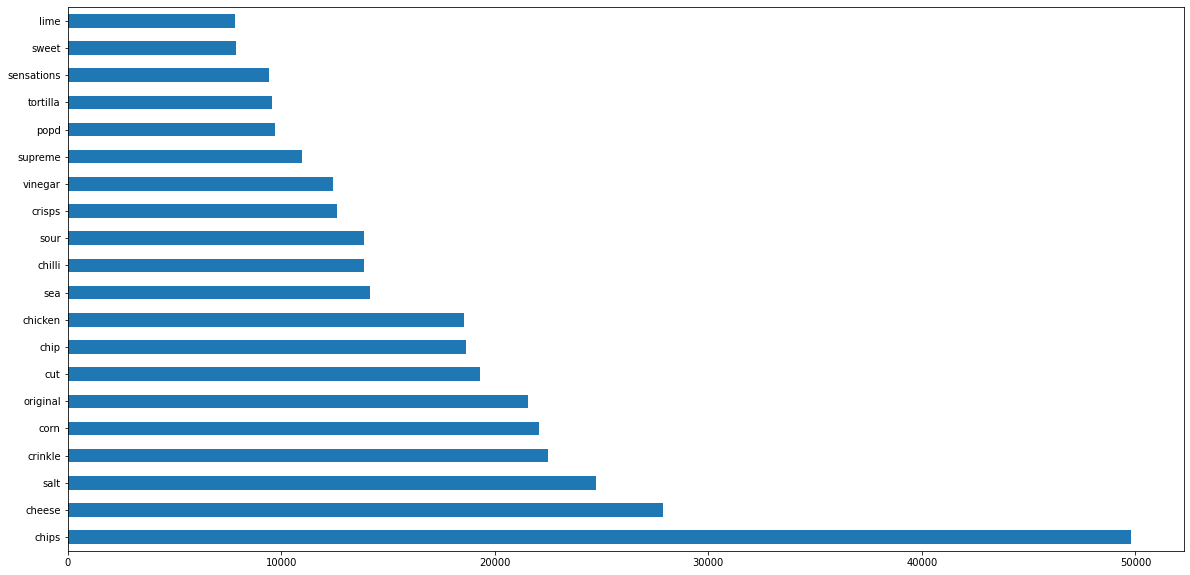

In [173]:
#top 20
chips_data.PROD_DESC.str.split(expand=True).stack().value_counts()[:20].plot(kind='barh', figsize=(20,10))

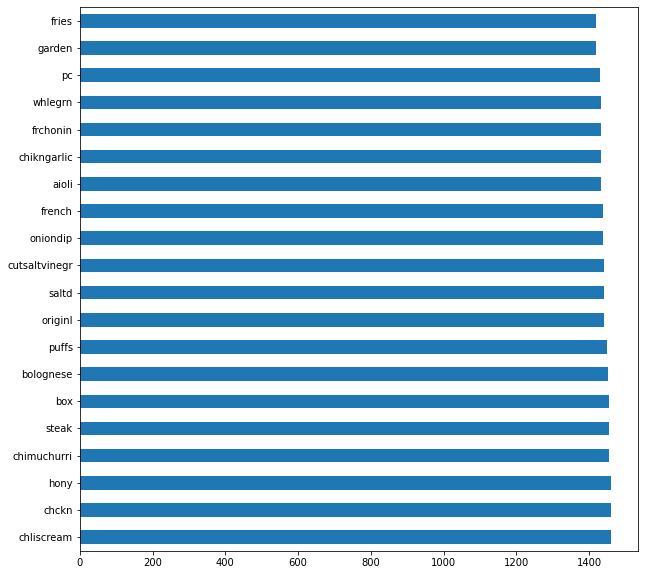

In [174]:
#bottom 20
chips_data.PROD_DESC.str.split(expand=True).stack().value_counts()[-20:].plot(kind='barh', figsize=(10,10))

You can see words like chips, chip, chp are all the same and the most frquent observation is chips and least being fries, garden, onion dip, honey, chilliscream etc which is all equally distributed.

Also flavourings such as cheese,salt, crinkle,corn,chicken etc seem to be the most common descriptions among chips. A mix of these flavours could be the most sought out among the chips section. This needs further investigation.

In [175]:
chips_data.describe()

,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


Based on previous observation as well , the outlier still exists . 3rd quartile value to the Maximum value difference is too high for both production qty and total sales. Further investigation on this is needed before the removal.

In [176]:
chips_data[chips_data['TOT_SALES']== 650]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380,corn chp supreme
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380,corn chp supreme


Looks like there are 2 data points with prod_qty 200 and Total Sales 650, and both belongs to the same customer Loyalty card number 226000. Lets do a check on the card holder to cross check if they do have other purchases. 

In [177]:
chips_data[chips_data['LYLTY_CARD_NBR']== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC
69762,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380,corn chp supreme
69763,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380,corn chp supreme


In [178]:
behaviour[behaviour['LYLTY_CARD_NBR']== 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


This confirms that the particular customer could be a bulk buyer and hence we could consider this as an outlier and remove it. On checking the behaviour dataset looks like they are premium customers under older families category.



In [179]:
dategroup = chips_data.groupby('DATE')[['TXN_ID']].count()

In [180]:
dategroup

,TXN_ID
DATE,
2018-07-03,663
2018-07-04,650
2018-07-05,674
2018-07-06,669
2018-07-07,660
...,...
2019-06-28,657
2019-06-29,669
2019-06-30,673


Only 364 rows which shows there is a missing date. lets find the missing date.

In [181]:
pd.date_range(start = '2018-07-03', end = '2019-07-02' ).difference(dategroup.index)

DatetimeIndex(['2018-12-27'], dtype='datetime64[ns]', freq=None)

Looks like the missing date is 27th of december 2018.

In [182]:
dategroup = dategroup.reindex(pd.date_range("2018-07-03", "2019-07-02"), fill_value= 0)

In [183]:
dategroup

,TXN_ID
2018-07-03,663
2018-07-04,650
2018-07-05,674
2018-07-06,669
2018-07-07,660
...,...
2019-06-28,657
2019-06-29,669
2019-06-30,673
2019-07-01,703


In [184]:
dategroup['TXN_ID']= dategroup['TXN_ID'].astype('int')

In [185]:
px.line(dategroup,dategroup.index,dategroup['TXN_ID'])


Transactions over time is plotted. The huge dip indicating zero is for the missing date december 27 2018. The Increase in sales highlighted around december last week should ideally be due to christmas season.

Its time to merge our datasets under leftjoin with chips as the main table to which we shall add life stage and premium customer details as well. Before that lets get rid of the outlier. We do have a lot of methods including IQR method, however since the dataset has only 2 outliers , lets go with a simple code.

In [186]:
chips = chips_data[chips_data['LYLTY_CARD_NBR']!= 226000]

In [187]:
chips.describe()

,PROD_QTY,TOT_SALES
count,246740.000000,246740.000000
mean,1.906456,7.316113
std,0.342499,2.474897
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,5.000000,29.500000


Outliers has been removed 

In [188]:
behaviour['LYLTY_CARD_NBR'] = behaviour['LYLTY_CARD_NBR'].astype('object')

In [189]:
merged = chips.merge(behaviour, on='LYLTY_CARD_NBR', how='left')

In [190]:
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,chip compny seasalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,nacho cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,crinkle cut chips chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,chip thinly screamonion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,tortilla chpshnyjlpno chili,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,sweet chilli and sour cream,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,splash of lime,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,mexicana,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,corn chip mexican jalapeno,YOUNG SINGLES/COUPLES,Premium


In [191]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 13 columns):
DATE                246740 non-null datetime64[ns]
STORE_NBR           246740 non-null object
LYLTY_CARD_NBR      246740 non-null object
TXN_ID              246740 non-null object
PROD_NBR            246740 non-null object
PROD_NAME           246740 non-null object
PROD_QTY            246740 non-null int64
TOT_SALES           246740 non-null float64
BRAND_NAME          246740 non-null object
PROD_PKG            246740 non-null object
PROD_DESC           246740 non-null object
LIFESTAGE           246740 non-null object
PREMIUM_CUSTOMER    246740 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 26.4+ MB


In [192]:
merged.describe()

,PROD_QTY,TOT_SALES
count,246740.000000,246740.000000
mean,1.906456,7.316113
std,0.342499,2.474897
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,5.000000,29.500000


In [193]:
merged.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND_NAME          0
PROD_PKG            0
PROD_DESC           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

No Null values or outliers in the final merged table. The dataset is finally ready for analysis

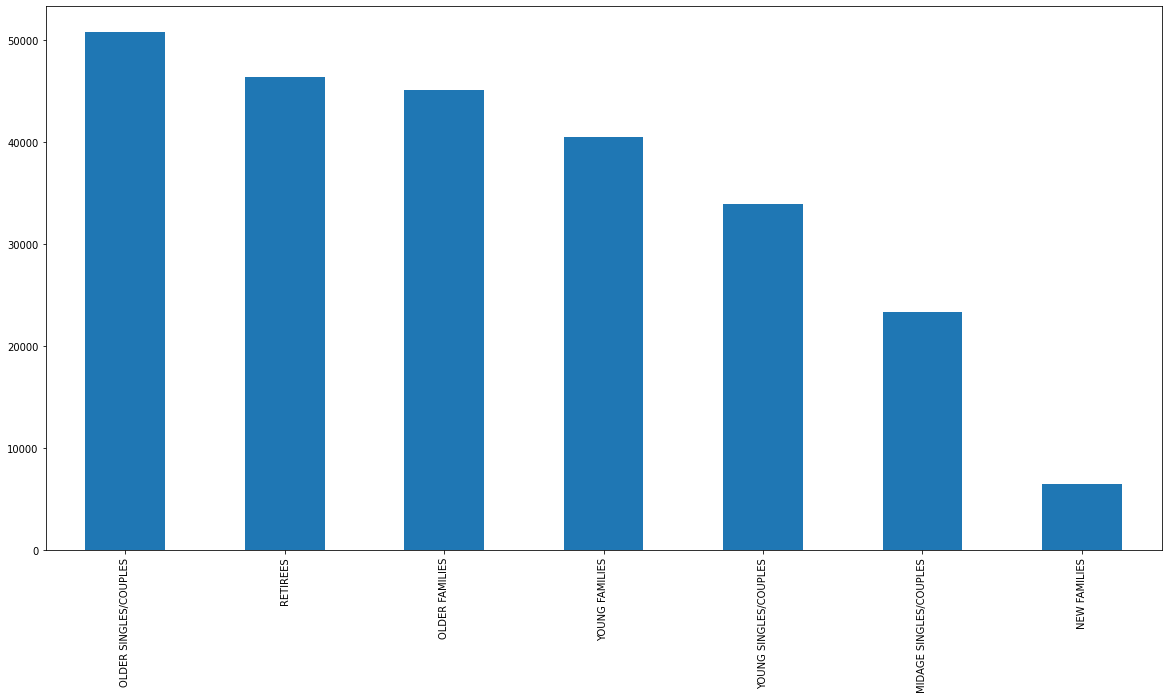

In [194]:
merged.LIFESTAGE.value_counts().plot(kind='bar',figsize=(20,10))

Older singles/couples seems to do the most of purchases and the least being new families

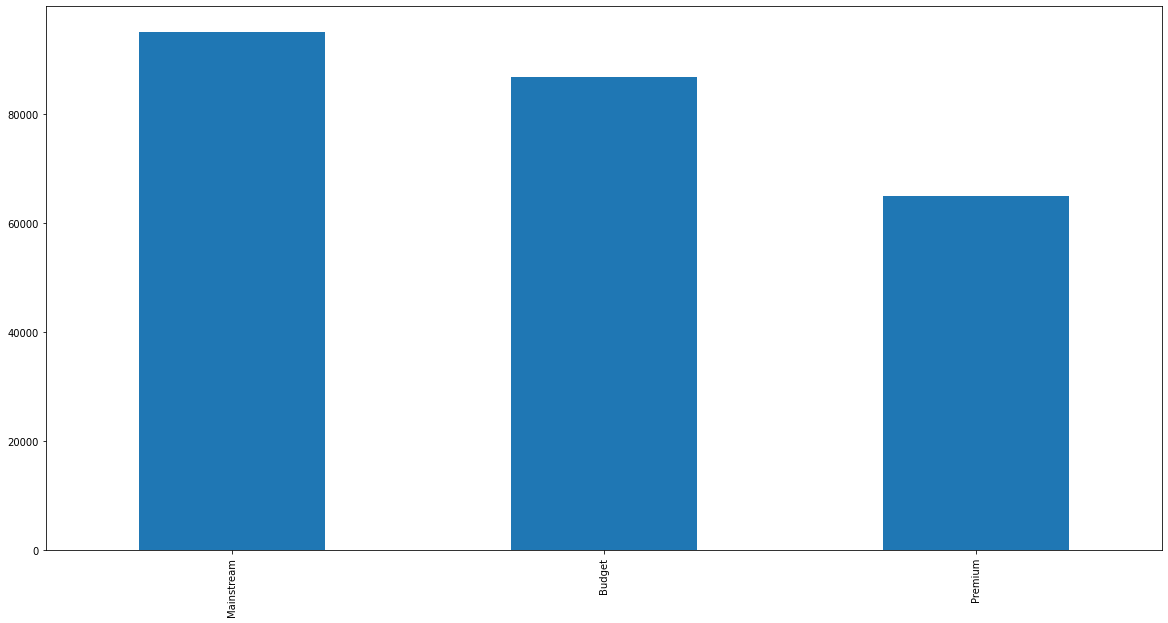

In [195]:
merged.PREMIUM_CUSTOMER.value_counts().plot(kind='bar',figsize=(20,10))

Mainstream membership seems to be the top buying performer followed by budget and premium customers.

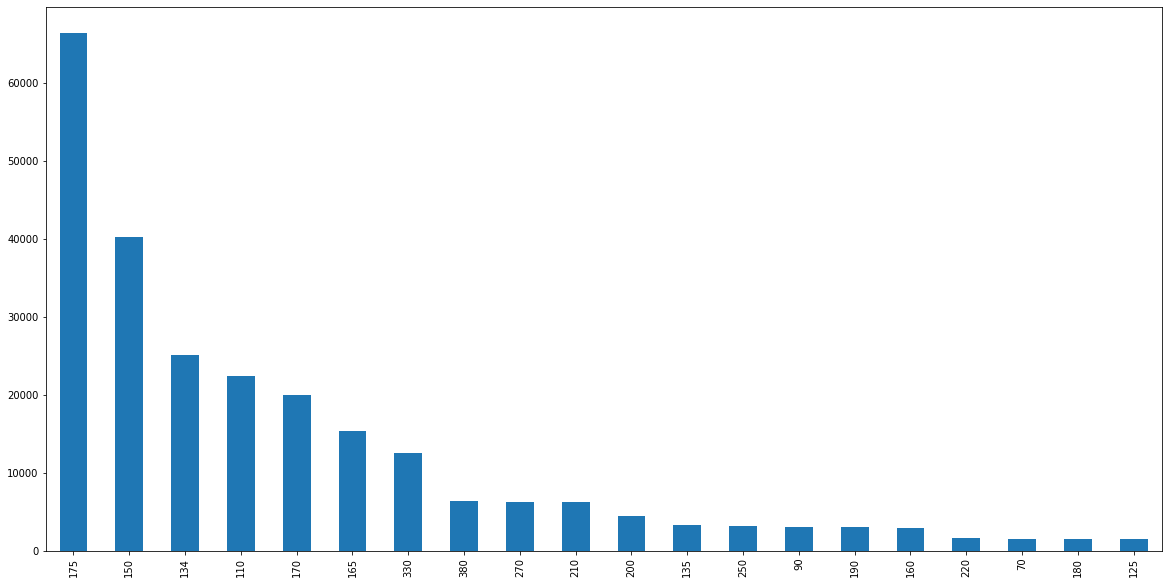

In [196]:
merged.PROD_PKG.value_counts().plot(kind='bar',figsize=(20,10))

By dimensions 175gms seems to be in top followed 150,134,170 and 165 in order as the top 5 performers.

125,180,70,220,160 gms seems to be in least purchased frequency. 

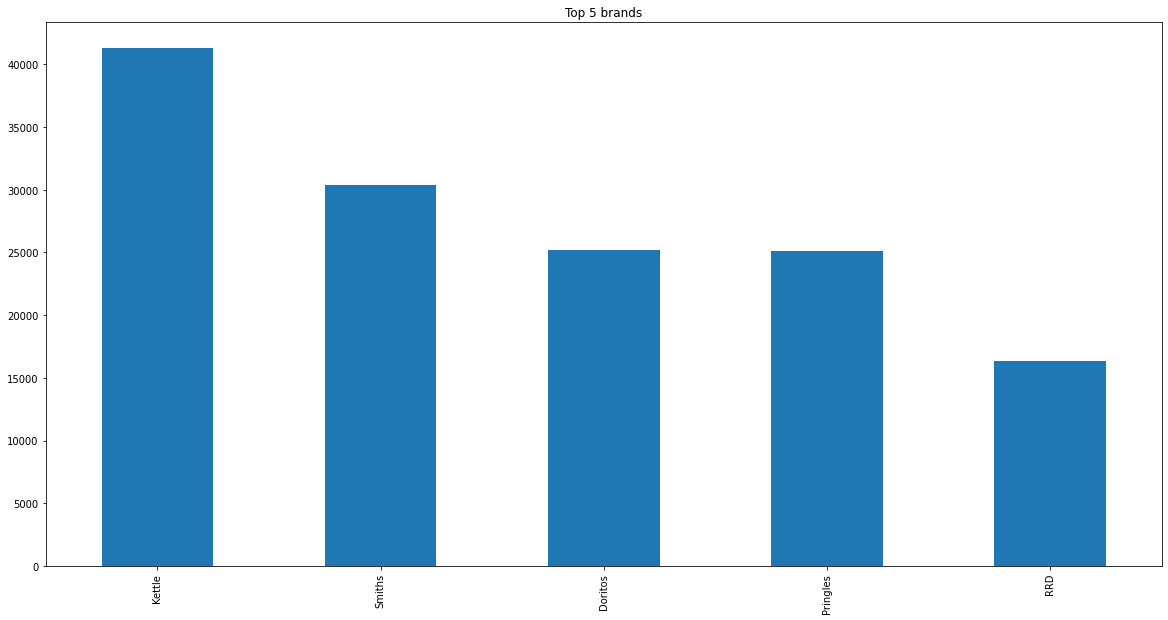

In [197]:
merged.BRAND_NAME.value_counts()[:5].plot(kind='bar',figsize=(20,10))
plt.title("Top 5 brands")
plt.show()

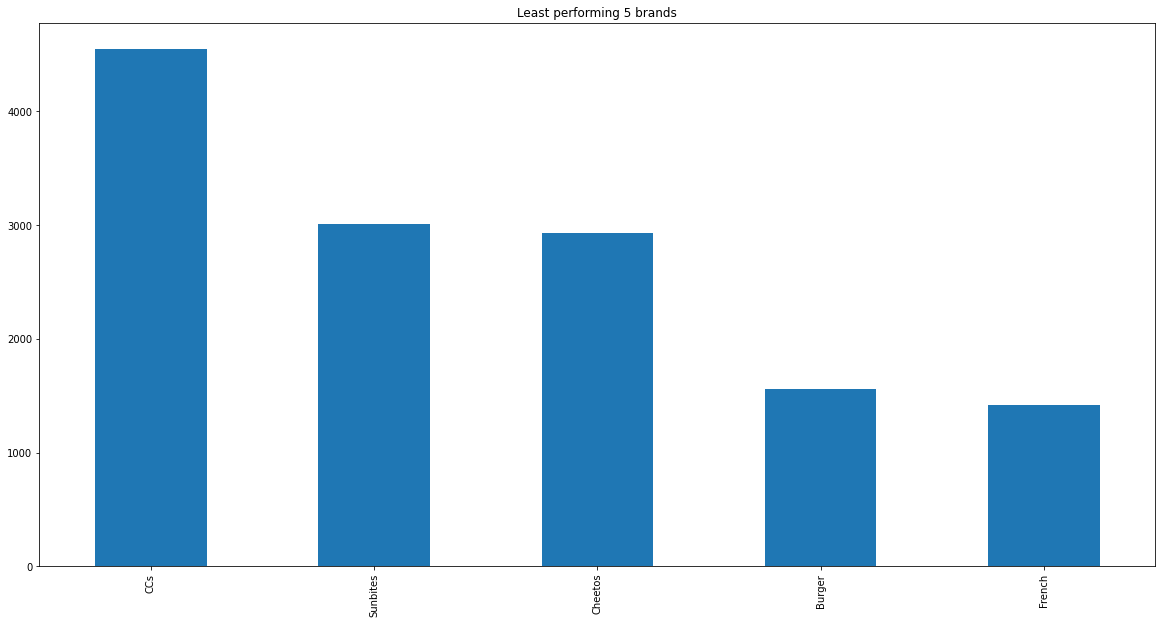

In [198]:
merged.BRAND_NAME.value_counts()[-5:].plot(kind='bar',figsize=(20,10))
plt.title("Least performing 5 brands")
plt.show()

In [199]:
totalsales_cust= merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
totalsales_cust = totalsales_cust.sort_values('TOT_SALES', ascending=False)


In [200]:
totalsales_cust

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


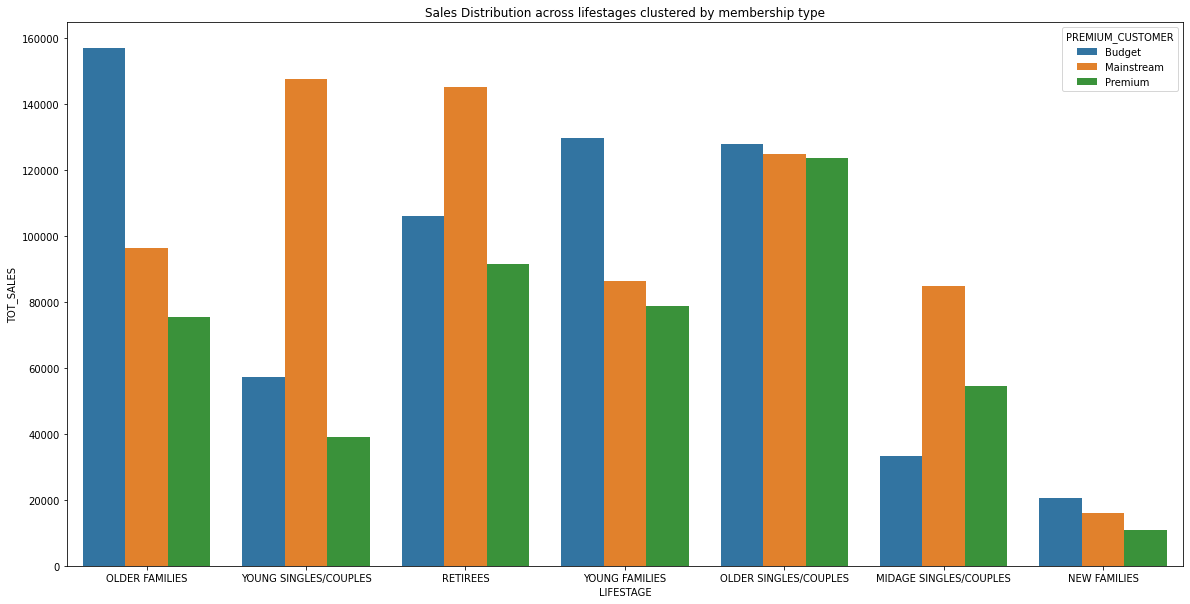

In [201]:
plt.figure(figsize=(20,10))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data = totalsales_cust)
plt.title("Sales Distribution across lifestages clustered by membership type")
plt.show()


In [202]:
from pivottablejs import pivot_ui

In [203]:
#proportion graph using pivot table.
pivot_ui(merged)

Sales are coming mainly from  Mainstream due to performance of- young singles/couples, retirees and budget older families.
New families offer the overall low in terms of sales in any membership.



In [204]:
totalsales_brands= merged.groupby(['BRAND_NAME','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
totalsales_brands = totalsales_brands.sort_values('TOT_SALES', ascending=False)

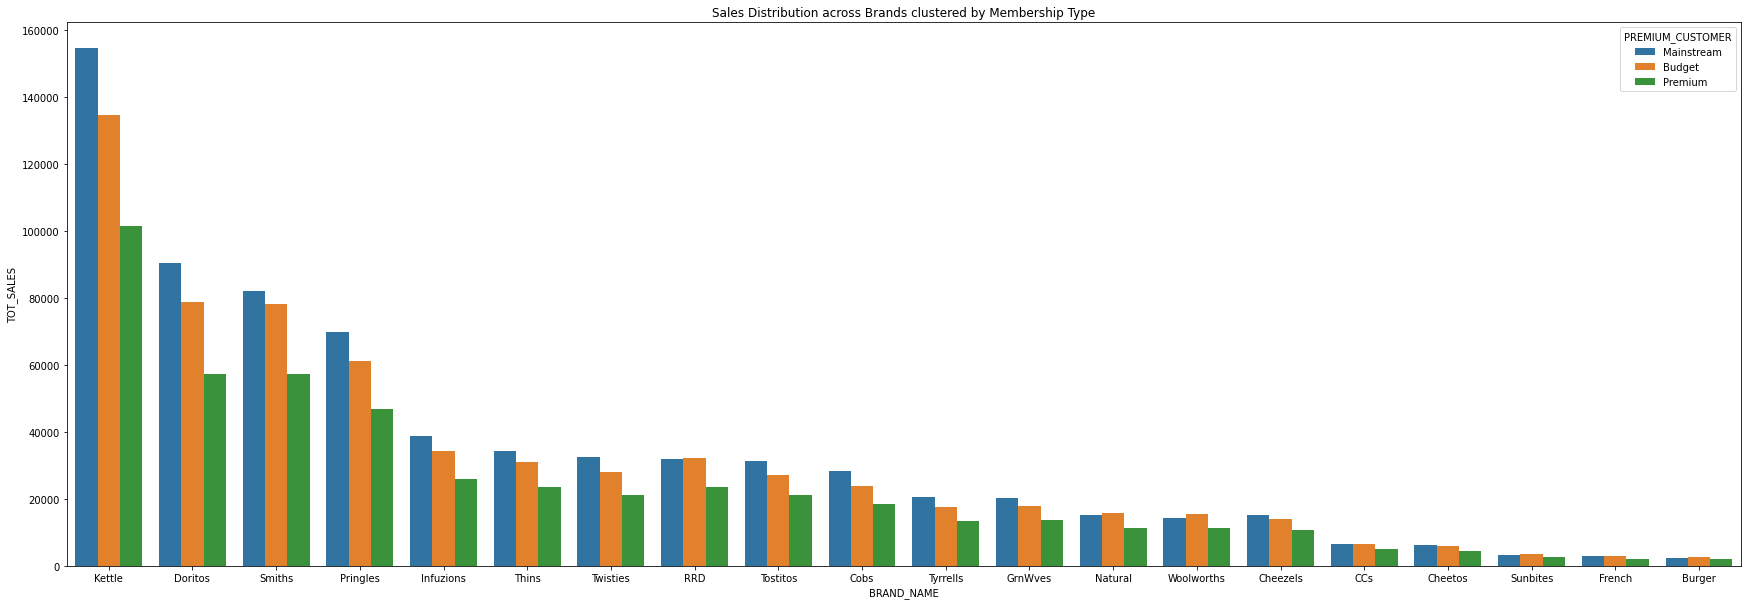

In [205]:

plt.figure(figsize=(30,10))
sns.barplot(x='BRAND_NAME',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data = totalsales_brands)
plt.title("Sales Distribution across Brands clustered by Membership Type")
plt.show()

Overall in terms of Brand performance by membership type, all membership types has an almost equall distribution in terms of sales per brand.

Kettle, Doritos ,Smiths, Pringles seems to be contributing to the most in Sales per brand wirh kettle leading heavily.

As shown earlier , Mainstream seems to be the most sought out membership type.



In [206]:
grouped_royalty = merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['LYLTY_CARD_NBR']].nunique().reset_index()

In [207]:
grouped_royalty = grouped_royalty.rename(columns={"LYLTY_CARD_NBR": "Loyalty_Card_Members"})

In [208]:
grouped_royalty=grouped_royalty.sort_values('Loyalty_Card_Members', ascending=False)


In [209]:
grouped_royalty

,LIFESTAGE,PREMIUM_CUSTOMER,Loyalty_Card_Members
19,YOUNG SINGLES/COUPLES,Mainstream,7917
13,RETIREES,Mainstream,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858
9,OLDER SINGLES/COUPLES,Budget,4849
11,OLDER SINGLES/COUPLES,Premium,4682
6,OLDER FAMILIES,Budget,4611
12,RETIREES,Budget,4385
15,YOUNG FAMILIES,Budget,3953
14,RETIREES,Premium,3812
18,YOUNG SINGLES/COUPLES,Budget,3647


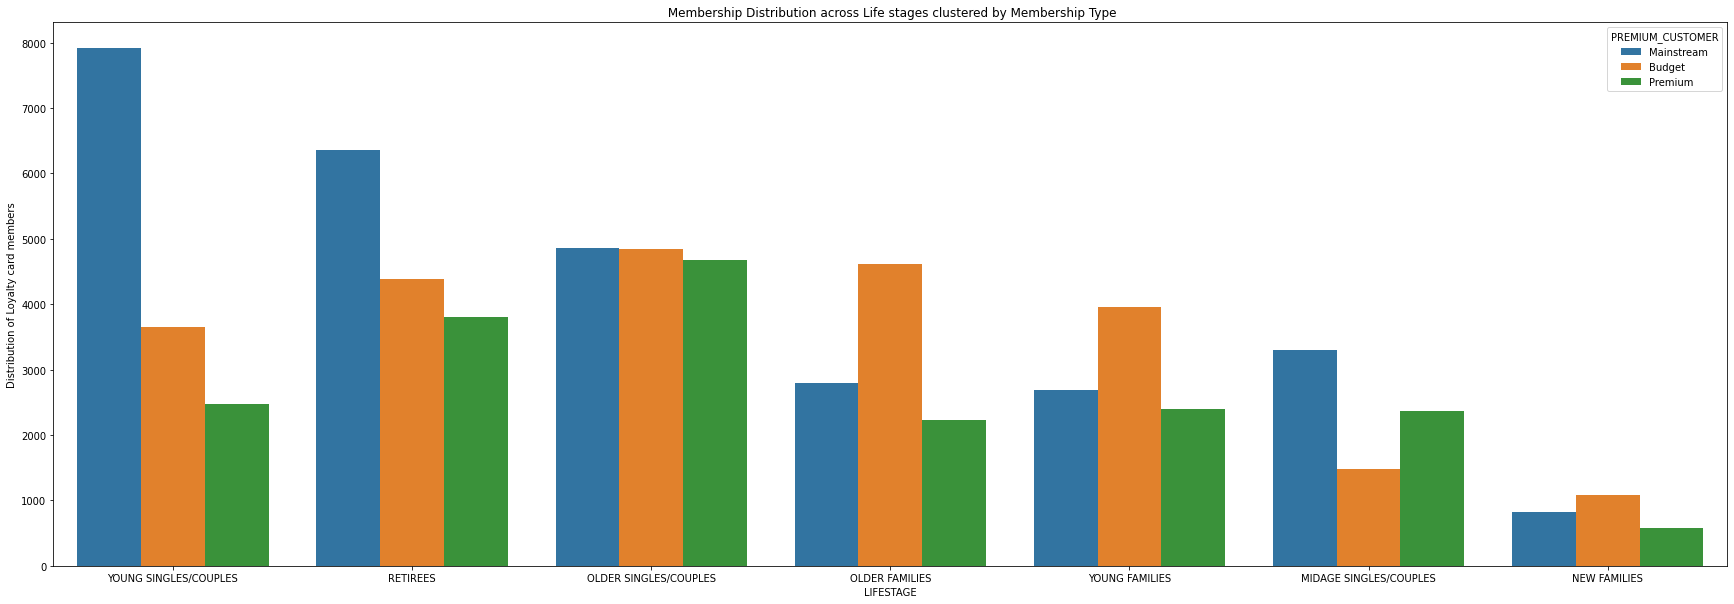

In [210]:
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='Loyalty_Card_Members',hue='PREMIUM_CUSTOMER',data = grouped_royalty)
plt.title(" Membership Distribution across Life stages clustered by Membership Type")
plt.ylabel('Distribution of Loyalty card members')
plt.show()

Old Singles/Couples have a pretty evenly distribution across all membership types.

Older Families and Retirees tend to be more on budget and premium memberships

Customer segmentation is more from  Mainstream due to performance of- young singles/couples, retirees and older single/ couples.


In [212]:
avgunits_cust= merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].mean().reset_index()

In [213]:
avgunits_cust = avgunits_cust.rename(columns={"PROD_QTY": "Avg_Prod_Qty"})

In [214]:
avgunits_cust=avgunits_cust.sort_values('Avg_Prod_Qty', ascending=False)

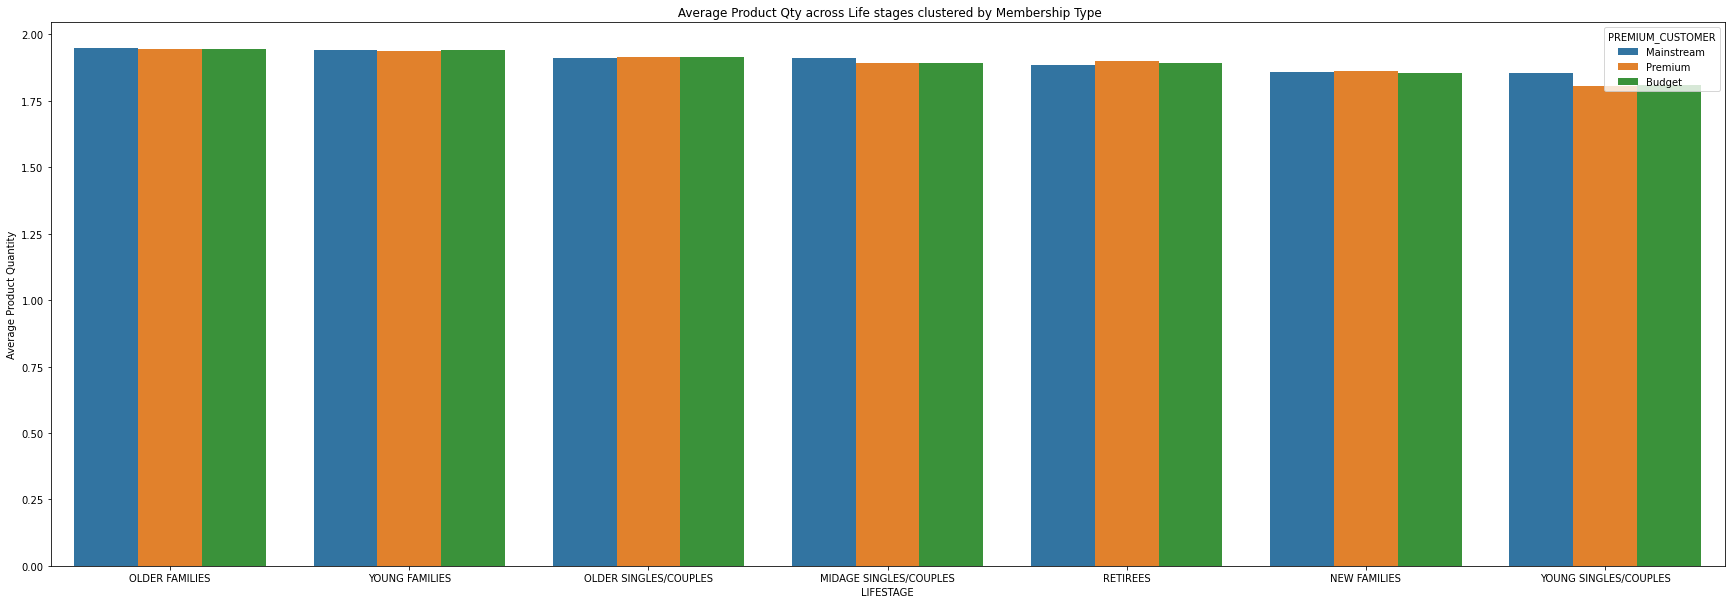

In [215]:
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='Avg_Prod_Qty',hue='PREMIUM_CUSTOMER',data = avgunits_cust )
plt.title(" Average Product Qty across Life stages clustered by Membership Type")
plt.ylabel('Average Product Quantity')
plt.show()

The Older and the Younger families  spend more on Product quantity than all the other categories. The reamining follow with almost similar trend but still lesser. 

In [216]:
avgprice_unit= merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES','PROD_QTY']].sum().reset_index()

In [217]:
avgprice_unit['AVG_price/unit']=avgprice_unit['TOT_SALES']/avgprice_unit['PROD_QTY']

In [218]:
avgprice_unit= avgprice_unit.sort_values('AVG_price/unit', ascending=False)

In [219]:
avgprice_unit

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AVG_price/unit
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20,36225,4.074043
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,3.994449
4,NEW FAMILIES,Mainstream,15979.70,4060,3.935887
12,RETIREES,Budget,105916.30,26932,3.932731
3,NEW FAMILIES,Budget,20607.45,5241,3.931969
14,RETIREES,Premium,91296.65,23266,3.924037
11,OLDER SINGLES/COUPLES,Premium,123537.55,31695,3.897698
9,OLDER SINGLES/COUPLES,Budget,127833.60,32883,3.887529
5,NEW FAMILIES,Premium,10760.80,2769,3.886168
13,RETIREES,Mainstream,145168.95,37677,3.852986


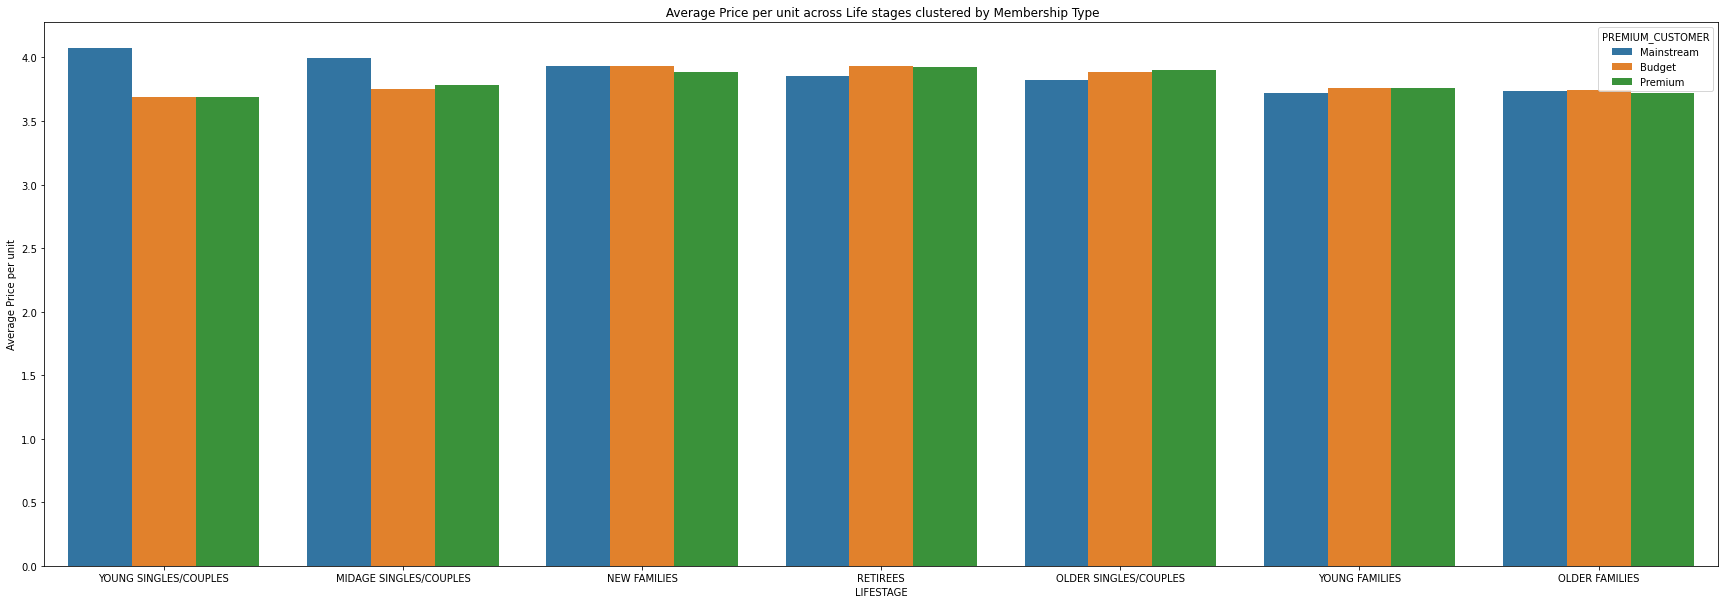

In [220]:
plt.figure(figsize=(30,10))
sns.barplot(x='LIFESTAGE',y='AVG_price/unit',hue='PREMIUM_CUSTOMER',data = avgprice_unit )
plt.title(" Average Price per unit across Life stages clustered by Membership Type")
plt.ylabel('Average Price per unit')
plt.show()

Midage single couples and Young single couples spend more on average price per unit bought especially in Mainstream membership.There is a clear trend here based on previous visualizations as well, that the younger and mid age couples are less likely to be taking premium memberships on purchasing products. Their consumption pattern could be mostly for entertainment rather than healthy snacks compared to the others.

Except for these two categories, remaining lifestyle trends almost remain the same across various memberships. How significantly large is the group from others?

Next step is to do a t-test to verify if there is any statistical significance to the unit price for mainstream,
young and mid-age singles and couples [ARE / ARE NOT] significantly higher than
that of budget or premium, young and midage singles and couples.



In [221]:
merged['PricePerUnit'] = merged['TOT_SALES'] / merged['PROD_QTY']

In [222]:
sample1 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] == 'Mainstream')]
sample2 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] != 'Mainstream')]

In [223]:
sample1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER,PricePerUnit
4692,2019-05-20,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,Doritos,170,corn chips nacho cheese,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-05-18,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,Doritos,170,mexicana,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4694,2018-08-20,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,sweet chilli and sour cream,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4695,2019-05-21,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,Doritos,170,corn chips original,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2018-08-21,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,Kettle,150,sensations siracha lime,MIDAGE SINGLES/COUPLES,Mainstream,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240884,2018-12-03,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs,110,popd sea salt chips,YOUNG SINGLES/COUPLES,Mainstream,3.8
240885,2018-07-29,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,Kettle,150,sensations siracha lime,YOUNG SINGLES/COUPLES,Mainstream,4.6
240886,2018-11-12,272,272389,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,Pringles,134,sweetspcy bbq,YOUNG SINGLES/COUPLES,Mainstream,3.7
240887,2019-04-03,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134,mystery flavour,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [224]:
sample2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER,PricePerUnit
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,chip compny seasalt,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,nacho cheese,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,crinkle cut chips chicken,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,chip thinly screamonion,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,tortilla chpshnyjlpno chili,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,sweet chilli and sour cream,YOUNG SINGLES/COUPLES,Premium,5.40
246736,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,splash of lime,YOUNG SINGLES/COUPLES,Premium,4.40
246737,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,mexicana,YOUNG SINGLES/COUPLES,Premium,4.40
246738,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,corn chip mexican jalapeno,YOUNG SINGLES/COUPLES,Premium,3.90


The sample size is unequal. Lets test for normality

(array([1497.,  693., 3793., 2860., 7526., 4997., 3692., 2798., 2358.,
         425.]),
 array([1.7 , 2.18, 2.66, 3.14, 3.62, 4.1 , 4.58, 5.06, 5.54, 6.02, 6.5 ]),
 <a list of 10 Patch objects>)

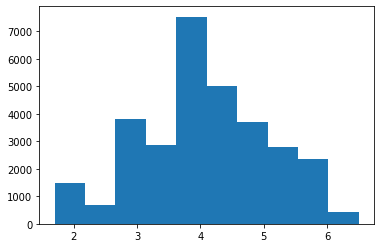

In [225]:
plt.hist(sample1.PricePerUnit)

(array([1006., 2122., 2206., 5751., 6169., 3391., 2474., 1817., 1476.,
         316.]),
 array([1.35 , 1.865, 2.38 , 2.895, 3.41 , 3.925, 4.44 , 4.955, 5.47 ,
        5.985, 6.5  ]),
 <a list of 10 Patch objects>)

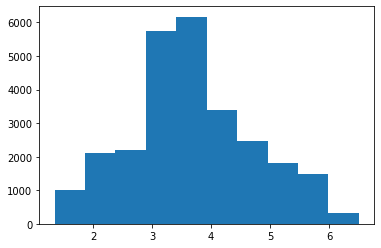

In [226]:
plt.hist(sample2.PricePerUnit)

Both of them are normalized.

Considering they are independent samples,unequal sample sizes and normalized data we first test them for variance ; F test and Levenes test in this case, followed by a t-test depending on the result ( pooled variance /seperate variance)

In [227]:
from scipy import stats
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(sample1.PricePerUnit, sample2.PricePerUnit)


(0.850654305949911, 1.0)

P value is extending to 1 ; F-test is not really ideal when our sample sizes are largely unequal which might lead to false assumptions.

In [228]:
#testing for equality of variances for unequal sample sizes using levenes test
from scipy.stats import levene
a=sample1.PricePerUnit.values.tolist()
b=sample2.PricePerUnit.values.tolist()
stat, p = levene(a,b)
print('t=%.3f, p=%.3f ' % (stat, p))

t=162.619, p=0.000 


With a p value less than 0.05 we can reject the null hypothesis; hence we prove there is no equality in variance between the 2 samples.

In [229]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sample1.PricePerUnit, sample2.PricePerUnit,equal_var=True)
print('t=%.3f, p=%.3f ' % (stat, p))

t=37.832, p=0.000 


Since we can reject the null hypothesis yet again; the unit price for mainstream,young and mid-age singles and couples is  significantly higher than that of budget or premium, young and midage singles and couples.

In [230]:
Analysis1 = merged[(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] == 'Mainstream')]

In [231]:
Analysis1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PROD_PKG,PROD_DESC,LIFESTAGE,PREMIUM_CUSTOMER,PricePerUnit
221345,2018-08-18,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,Smiths,150,crinkle cut snagsauce,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-19,1,1163,188,46,Kettle Original 175g,1,5.4,Kettle,175,original,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-16,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,Woolworths,200,supreme cheese corn chips,YOUNG SINGLES/COUPLES,Mainstream,1.9
221348,2019-05-17,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,Smiths,380,crnkle chip orgnl big bag,YOUNG SINGLES/COUPLES,Mainstream,5.9
221349,2019-05-20,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,Pringles,134,mystery flavour,YOUNG SINGLES/COUPLES,Mainstream,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240884,2018-12-03,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs,110,popd sea salt chips,YOUNG SINGLES/COUPLES,Mainstream,3.8
240885,2018-07-29,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,Kettle,150,sensations siracha lime,YOUNG SINGLES/COUPLES,Mainstream,4.6
240886,2018-11-12,272,272389,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,Pringles,134,sweetspcy bbq,YOUNG SINGLES/COUPLES,Mainstream,3.7
240887,2019-04-03,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134,mystery flavour,YOUNG SINGLES/COUPLES,Mainstream,3.7


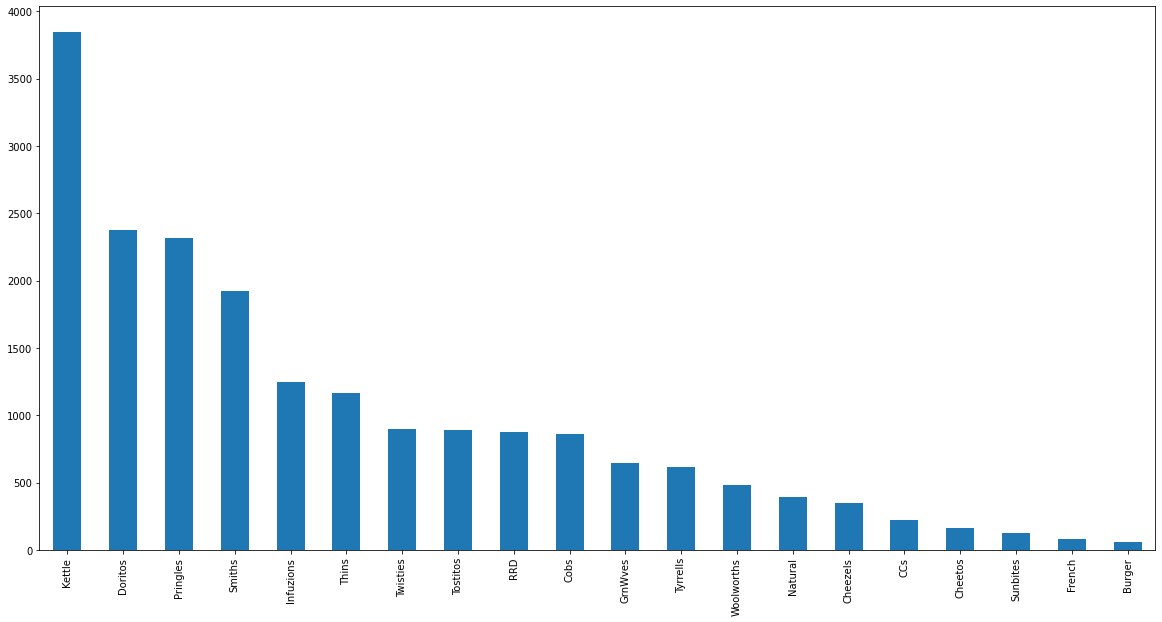

In [232]:
Analysis1.BRAND_NAME.value_counts().plot(kind='bar',figsize=(20,10))

Looks like kettle is the most preferred brand among the Young Singles/Couples of Mainstream membership.

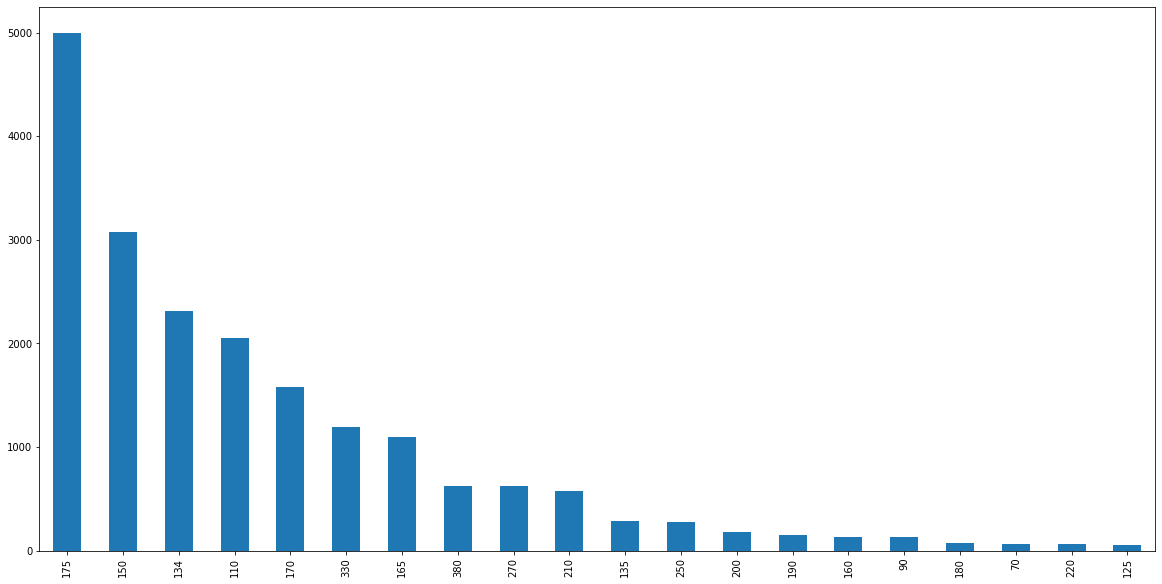

In [233]:
Analysis1.PROD_PKG.value_counts().plot(kind='bar',figsize=(20,10))

Based on previous analysis as well, looks like Young/Single Couples are the major contributors to the packsizes 175gms in top followed 150,134,170 and 165 in order as the top 5 performers. 

Lets do a basket analysis for Young.

In [285]:
 basket1= Analysis1.groupby(['LYLTY_CARD_NBR', 'BRAND_NAME'])['PROD_QTY'].sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')

In [286]:
basket1

BRAND_NAME,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,GrnWves,Infuzions,Kettle,Natural,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [287]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket1.applymap(encode_units)


In [288]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [297]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [298]:
frequent_itemsets

,support,itemsets
0,0.103827,(Cobs)
1,0.260326,(Doritos)
2,0.078818,(GrnWves)
3,0.143110,(Infuzions)
4,0.387142,(Kettle)
5,0.256158,(Pringles)
6,0.093975,(RRD)
7,0.202476,(Smiths)
8,0.136036,(Thins)
9,0.105848,(Tostitos)


In [276]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheetos),(Burger),0.020336,0.007579,0.001010,0.049689,6.556522,0.000856,1.044313
1,(Burger),(Cheetos),0.007579,0.020336,0.001010,0.133333,6.556522,0.000856,1.130382
2,(Doritos),(Burger),0.260326,0.007579,0.002779,0.010674,1.408491,0.000806,1.003129
3,(Burger),(Doritos),0.007579,0.260326,0.002779,0.366667,1.408491,0.000806,1.167907
4,(Infuzions),(Burger),0.143110,0.007579,0.001389,0.009709,1.281068,0.000305,1.002151


In [255]:
basket2= Analysis1.groupby(['LYLTY_CARD_NBR', 'PROD_PKG'])['PROD_QTY'].sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')

In [256]:
basket_sets2 = basket2.applymap(encode_units)

In [257]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.07, use_colnames=True)

In [258]:
frequent_itemsets2.sort_values('support',ascending=False)

,support,itemsets
5,0.458254,(175)
2,0.313755,(150)
1,0.256158,(134)
0,0.224454,(110)
4,0.176835,(170)
8,0.139320,(330)
13,0.137931,"(175, 150)"
3,0.127700,(165)
12,0.111153,"(134, 175)"
10,0.094480,"(175, 110)"


In [301]:
rules_pkg=association_rules(frequent_itemsets2, metric="lift")

In [302]:
rules_pkg.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(175),(110),0.458254,0.224454,0.094480,0.206174,0.918560,-0.008377,0.976973
1,(110),(175),0.224454,0.458254,0.094480,0.420934,0.918560,-0.008377,0.935551
2,(134),(150),0.256158,0.313755,0.075028,0.292899,0.933528,-0.005342,0.970505
3,(150),(134),0.313755,0.256158,0.075028,0.239130,0.933528,-0.005342,0.977621
4,(134),(175),0.256158,0.458254,0.111153,0.433925,0.946909,-0.006232,0.957021


Lift value is less than 1 for both association properties for Young Singles/Couple Mainstream mebership in terms of relationships between various package sizes or brands. This means that the evidence does not support enough for strong relationships between multiple brands or dimensions.


Apriori Algorithm wise the frequency of occurence for each brand and packaging for Young Singles/Couple Mainstream membership is as follows:

Kettle 38%, Doritos, 26%, Pringles 25%, Smiths 20%

175 gms has a 45% frequency, 150 gms 31 %, 134 gms 25% etc.



In [263]:
quantity_bybrand =  Analysis1.groupby(['BRAND_NAME'])[['PROD_QTY']].sum().reset_index()

In [264]:
quantity_bybrand.PROD_QTY = quantity_bybrand.PROD_QTY / Analysis1.PROD_QTY.sum()

In [266]:
quantity_bybrand =quantity_bybrand.rename(columns={"PROD_QTY": "Targeted_Segment"})

In [267]:
quantity_bybrand

,BRAND_NAME,Targeted_Segment
0,Burger,0.002926
1,CCs,0.011180
2,Cheetos,0.008033
3,Cheezels,0.017971
4,Cobs,0.044638
5,Doritos,0.122761
6,French,0.003948
7,GrnWves,0.032712
8,Infuzions,0.064679
9,Kettle,0.197985


In [268]:
other = merged[~(merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES"]))  & (merged['PREMIUM_CUSTOMER'] != 'Mainstream')]

In [269]:
other_bybrand =  other.groupby(['BRAND_NAME'])[['PROD_QTY']].sum().reset_index()
other_bybrand.PROD_QTY = other_bybrand.PROD_QTY / other.PROD_QTY.sum()
other_bybrand =other_bybrand.rename(columns={"PROD_QTY": "Other_Segment"})

In [270]:
merged_segment_test = quantity_bybrand.merge(other_bybrand, on='BRAND_NAME', how='outer')

In [271]:
merged_segment_test['Affinitytobrand'] = merged_segment_test['Targeted_Segment']/merged_segment_test['Other_Segment']

In [272]:
merged_segment_test.sort_values('Affinitytobrand',ascending=False)

,BRAND_NAME,Targeted_Segment,Other_Segment,Affinitytobrand
18,Tyrrells,0.031553,0.025715,1.227025
17,Twisties,0.046184,0.037933,1.217506
5,Doritos,0.122761,0.101171,1.213397
9,Kettle,0.197985,0.166560,1.188667
16,Tostitos,0.045411,0.038350,1.184100
11,Pringles,0.119420,0.101110,1.181090
4,Cobs,0.044638,0.038449,1.160959
8,Infuzions,0.064679,0.057410,1.126622
15,Thins,0.060373,0.057159,1.056217
7,GrnWves,0.032712,0.031069,1.052895


Tyrells, Twisties and Doritos has more than 20 % likelyhood to be the brand selection if the category is youngsingles/couples from mainstream. Brands such as woolsworth, burger and sunbites has more than 50% less likelyhood to be the brand selection.

In [316]:
quantity_bydesc =  Analysis1.groupby(['PROD_PKG'])[['PROD_QTY']].sum().reset_index()
quantity_bydesc.PROD_QTY = quantity_bydesc.PROD_QTY / Analysis1.PROD_QTY.sum()
quantity_bydesc =quantity_bydesc.rename(columns={"PROD_QTY": "Targeted_Segment"})

In [317]:
other_bydesc =  other.groupby(['PROD_PKG'])[['PROD_QTY']].sum().reset_index()
other_bydesc.PROD_QTY = other_bydesc.PROD_QTY / other.PROD_QTY.sum()
other_bydesc =other_bydesc.rename(columns={"PROD_QTY": "Other_Segment"})

In [318]:
qty_segment_test = quantity_bydesc.merge(other_bydesc, on='PROD_PKG', how='outer')

In [321]:
qty_segment_test['Affinitytopackaging'] = qty_segment_test['Targeted_Segment']/qty_segment_test['Other_Segment']

In [322]:
qty_segment_test.sort_values('Affinitytopackaging',ascending=False)

,PROD_PKG,Targeted_Segment,Other_Segment,Affinitytopackaging
15,270,0.031829,0.025070,1.269608
17,380,0.032160,0.025711,1.250827
16,330,0.061284,0.050974,1.202243
0,110,0.106280,0.089575,1.186492
2,134,0.119420,0.101110,1.181090
12,210,0.029124,0.024891,1.170020
3,135,0.014769,0.012931,1.142086
14,250,0.014355,0.012863,1.115959
7,170,0.080773,0.080347,1.005300
4,150,0.157598,0.163070,0.966449


Packing sizes 270 g , 380 g , 330 g has more than 20% likelyhood to be purchased by young singles/couples in mainstream segment.



In [327]:
analyseddata = merged[(merged['PROD_PKG'].isin(["270"]))]

In [328]:
analyseddata.BRAND_NAME.unique()

array(['Twisties'], dtype=object)

Twistes 270 gms seems to be most bought out product by Young Singles/ Couples Mainstream

Conclusion:

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees shoppers. 

We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.

We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population.
The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segmentswhere young singles and couples frequent more often to increase visibilty and impulse behaviour.

Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement. 
